# Ice Expansion Estimates Using NumPy and Pandas

“I would like to know how to find the area that the different colors on these ice maps cover. 

The idea is to determine what percent of the southern portion of Lake Michigan is covered by each color in order to calculate the average ice coverage on that part of the lake. 

The attached map is an example of an ice coverage map, and the link is to the website where the map originated; this website also has shapefiles and ASCII files in case either of those formats would be easier to handle.”

Original data from http://www.glerl.noaa.gov/data/pgs/glice/glice.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import time

%matplotlib inline

In [2]:
# Define input and output directories
data_dir = 'data/grid2008'
output_fn = 'out/grid_summary.csv'

# Get a list of all files in the data directory
fns = glob.glob(data_dir + '/*.ct')

# And an image from the middle of the list (one with ice!).  
# The CT format will return gridded values, i.e., a numpy array
I = np.genfromtxt(fns[20],skip_header=6,delimiter=3,dtype=np.int)
I

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

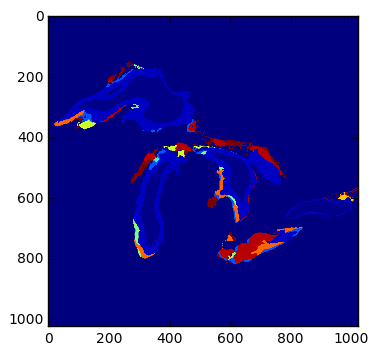

In [3]:
plt.imshow(I)

In [4]:
# Each pixel is an integer value corresponding to the amount of ice cover in that cell, but "binned" into easy to estimate 
# numbers (0, 5, 20, etc.)
values, counts = np.unique(I,return_counts=True)
print(values)
print(counts)

[ -1   0   5  20  40  50  60  70  80  95 100]
[899894  49116  61215   5804    184   2136   2087    493   6496  13329
   7822]


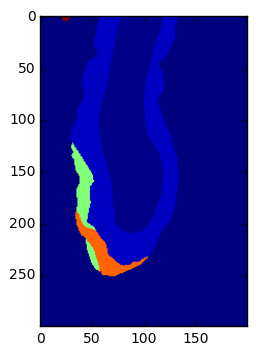

In [5]:
# We can "ballpark" a bounding box if we want to monitor a subset.  Using geospatial tools here would let us specify
# in Latitude and Longitude, but it's not too hard to pick things out with pixel coordinates.
# row_left, row_right, col_top, col_bottom
bb = [550,850,250,450] 
plt.imshow(I[bb[0]:bb[1],bb[2]:bb[3]])

In [6]:
# Create a list of values to search for; These are the only values the grid cells can take.  This is necessary because each image
# won't necessarily include all of these values - images from early in the year may not have any ice at all.  So these categories
# need to be gleaned from the metadata, or all the images searched initially.
columns = [-1,0,5,10,20,30,40,60,70,80,90,95,100]

In [11]:
# We're going to use these columns to search the image and count the number of pixel matching that "description" like this:
tabulation = np.zeros(len(columns))
for i,x in enumerate(columns):
    # Simultaneously subset the image, and create a boolean array where the image==x, then take the sum of those Trues.
    tabulation[i] = (I[bb[0]:bb[1],bb[2]:bb[3]]==x).sum()
print(tabulation)

# But this is much easier as a list comprehension
tabulation = [(I[bb[0]:bb[1],bb[2]:bb[3]]==x).sum() for x in columns]
print(tabulation)

[ 39855.   8941.   9212.      0.      0.      0.      0.      0.      0.
    952.      0.      0.     40.]
[39855, 8941, 9212, 0, 0, 0, 0, 0, 0, 952, 0, 0, 40]


In [7]:
# Create a dataframe to hold the values, and then iterate through the file list, loading each file in turn.

start_time = time.time()

df = pd.DataFrame()
for fn in fns:
    print(fn)
    try:
        # Load the image, and then tabulate
        I = np.genfromtxt(fn,skip_header=6,delimiter=3)
        tabulation = [(I[bb[0]:bb[1],bb[2]:bb[3]]==x).sum() for x in columns]
        
        # Insert date, extracted from filename
        tabulation.insert(0,int(fn[-11:-3]))
        print(tabulation)
        
        # Append to the dataframe. Putting the list tabulation inside a list
        # makes sure it appends row-by-row.
        df = df.append([tabulation],ignore_index=True)
    except:
        print(fn + ' did not load properly.')
        
end_time = time.time()

print('Processing complete.  Total time:', end_time - start_time)

data/grid2008\g20071126.ct
[20071126, 39855, 20145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data/grid2008\g20071129.ct
[20071129, 39855, 20145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data/grid2008\g20071203.ct
[20071203, 39855, 20105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0]
data/grid2008\g20071206.ct
[20071206, 39855, 19462, 643, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0]
data/grid2008\g20071210.ct
[20071210, 39855, 19734, 371, 0, 0, 0, 0, 0, 7, 0, 0, 33, 0]
data/grid2008\g20071213.ct
[20071213, 39855, 19838, 267, 0, 0, 0, 0, 0, 0, 0, 11, 0, 29]
data/grid2008\g20071217.ct
[20071217, 39855, 18273, 1832, 0, 0, 0, 0, 0, 0, 0, 0, 12, 28]
data/grid2008\g20071220.ct
[20071220, 39855, 18894, 1211, 0, 0, 0, 0, 0, 0, 0, 7, 0, 33]
data/grid2008\g20071224.ct
[20071224, 39855, 20105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40]
data/grid2008\g20071227.ct
[20071227, 39855, 20105, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 28]
data/grid2008\g20071231.ct
[20071231, 39855, 20044, 61, 0, 0, 0, 0, 0, 0, 0, 0, 12, 28]
data/grid2008\g20080103.ct
[20080103, 3

c:\python27\arcgis10.4\lib\site-packages\numpy\lib\npyio.py:1407: UserWarning: genfromtxt: Empty input file: "data/grid2008\g20080508.ct"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)


[20080512, 39855, 20145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data/grid2008\g20080515.ct
[20080515, 39855, 20145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
('Processing complete.  Total time:', 66.64599990844727)


In [13]:
# Set column names
df_cols = [str(i) for i in columns]
df_cols.insert(0,'date')
df.columns = df_cols

# Convert date field (an integer, e.g., 20080512) to a datetime
df.date = pd.to_datetime(df.date,format='%Y%m%d')

# Write out the file
df.to_csv(output_fn,index=False)

In [14]:
# Inspecting the data
df.head()

,date,-1,0,5,10,20,30,40,60,70,80,90,95,100
0,2007-11-26,39855,20145,0,0,0,0,0,0,0,0,0,0,0
1,2007-11-29,39855,20145,0,0,0,0,0,0,0,0,0,0,0
2,2007-12-03,39855,20105,0,0,0,0,0,0,0,0,0,40,0
3,2007-12-06,39855,19462,643,0,0,0,0,0,0,0,0,40,0
4,2007-12-10,39855,19734,371,0,0,0,0,0,7,0,0,33,0


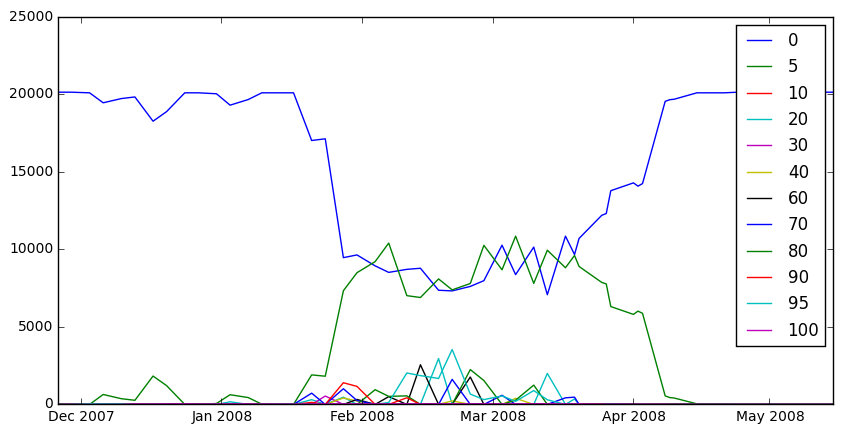

In [15]:
labels=df.columns.values[2:]
%matplotlib inline
fix, ax = plt.subplots(figsize=(10,5))
_ = plt.plot(df.date,df.ix[:,2:])
plt.legend(labels)

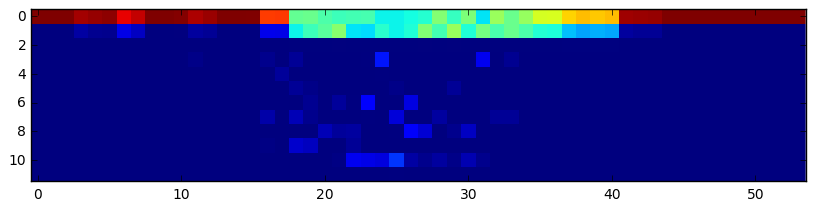

In [16]:
# You can also explore this data in another way: as an image.  Row zero is no ice, the last row is 100% ice,
# and columns are dates.
fig,ax = plt.subplots(figsize=(10,5))
plt.imshow(df.ix[:,2:].values.T,interpolation='none')